In [3]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
from torch import cuda
device = 'cuda' if cuda.is_available() else 'cpu'
print(device)

cpu


In [5]:
train_df = pd.read_csv("train_dev_data/train_set.csv").dropna()
dev_df = pd.read_csv("train_dev_data/dev_set.csv").dropna()
X_train = train_df['text']
y_train = train_df['label']
X_test = dev_df['text']
y_test = dev_df['label']

In [6]:
# Convert text data into numerical features using TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)  # Limit to 5000 features
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Train the Logistic Regression model
logreg_model = LogisticRegression(max_iter=1000)
logreg_model.fit(X_train_tfidf, y_train)

# Predict on the test set
y_pred = logreg_model.predict(X_test_tfidf)

Classification Report:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95      1894
           1       0.55      0.03      0.06       199

    accuracy                           0.91      2093
   macro avg       0.73      0.51      0.50      2093
weighted avg       0.87      0.91      0.87      2093

Confusion Matrix:
[[1889    5]
 [ 193    6]]


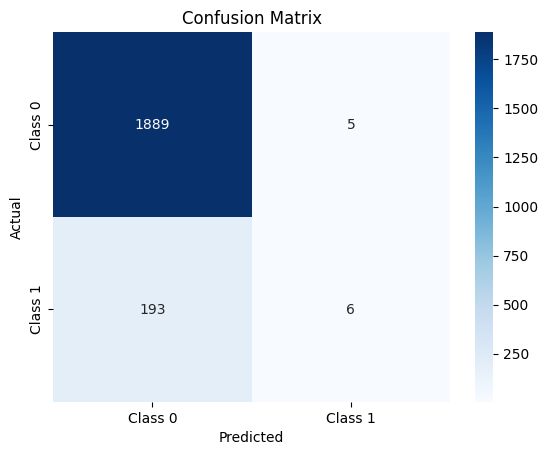

In [7]:
# Evaluate the model
# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Plot confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()